##  Theory

### Decision Tree Classifier In depth Intuition

### Post Pruning And Prepruning

### Decision Tree Regressor In depth Intuition

## Decision Tree Classifier Implementation with pre and post prenuuing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris 

In [3]:
dataset=load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import seaborn as sns

In [6]:
df=sns.load_dataset('iris')

In [7]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
### independent and dependent dataset
X=df.iloc[:,:-1]
y=dataset.target

In [9]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
## preprunning
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')## by defualt criterion is gini
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

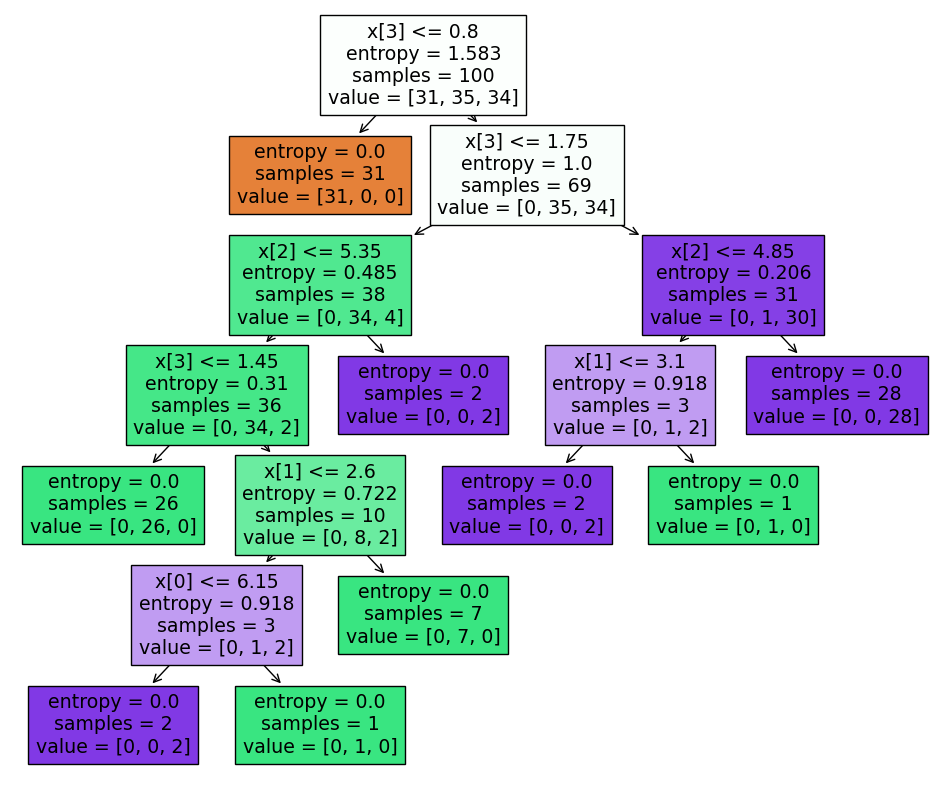

In [11]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)   ## filled=True is used to make it colour full

In [12]:
## post prunning
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

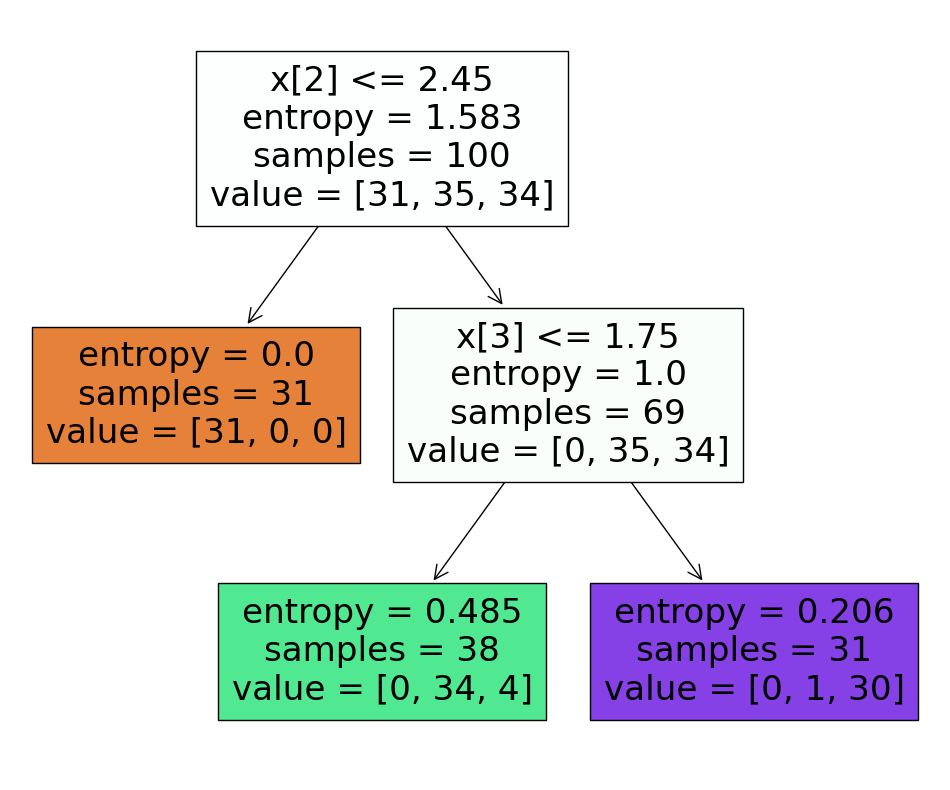

In [13]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [14]:
### prediction 
y_pred=classifier.predict(X_test)

In [15]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [16]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Decision Tree for Preprunning and Hyperparameter Tunning for a Huge Dataset

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
parameters = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'max_depth':[1,2,3,4,5],
              'max_features':['auto','squt','log2']
}

In [20]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [21]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5,scoring='accuracy')

In [22]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'squt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'best'}

In [24]:
y_pred=clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



##  Decision Tree Regression Implementation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [4]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['target']=california_df.target

In [6]:
df.shape

(20640, 9)

In [7]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['target']=california_df.target
df=df.sample(frac=0.25)

In [8]:
df.shape

(5160, 9)

In [9]:
## independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3437,3.4519,36.0,4.463303,1.013761,1086.0,4.981651,34.26,-118.42
1693,4.2269,14.0,5.874372,0.982412,1003.0,2.520101,38.00,-122.26
10607,6.0634,15.0,5.935275,1.067961,841.0,2.721683,33.68,-117.78
18888,2.3241,42.0,5.111437,1.137830,889.0,2.607038,38.11,-122.24
17514,4.7768,52.0,5.853755,1.100791,1215.0,2.401186,37.33,-121.92


In [11]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [13]:
y_pred=regressor.predict(X_test)

In [14]:
y_pred

array([2.821, 1.225, 1.493, ..., 1.5  , 1.142, 1.216])

In [15]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [16]:
score

0.54231263086724

In [17]:
### hyperparameter tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [21]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [26]:
regressor=DecisionTreeRegressor(criterion='poisson',max_depth=6,max_features='auto',splitter='best')

In [27]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='auto')

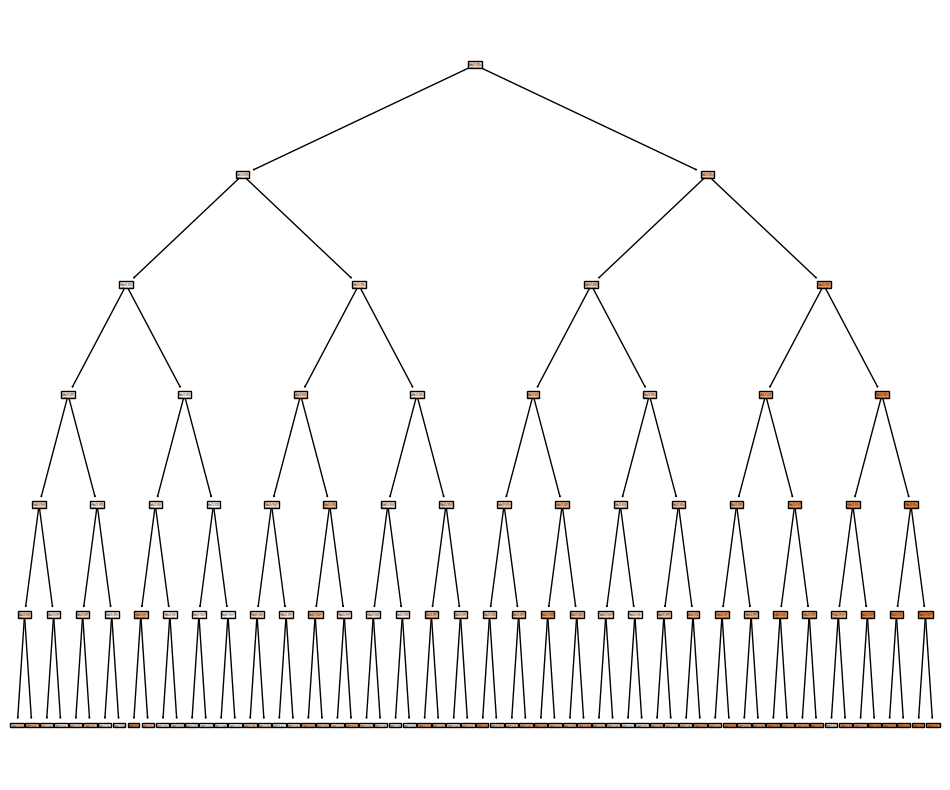

In [29]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [23]:
y_pred=regressorcv.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.648941200951971